# Kjemiske biblioteker

Det finnes mange Python-biblioteker som inneholder funksjonalitet rettet mot kjemi. Vi har til og med visualiserings- og simuleringsverktøy som er utviklet her på UiO! Her skal vi derimot se på noen eksternt utviklete biblioteker som kan brukes til enkle beregninger og visualiseringer. 

Først ser vi litt på biblioteket Mendeleev, som inneholder svært mye informasjon om grunnstoffene våre, og som dermed kan brukes til å visualisere og studere sammenhenger i periodesystemet. Deretter ser vi på biblioteket Chemlib, som også inneholder en del informasjon om grunnstoffene, men som også kan brukes til støkiometrisk beregninger og beregninger knyttet til elektrokjemiske celler. Til slutt ser vi på pHcalc, som brukes til å beregne pH i både enkle og sammensatte løsninger.

For å installere disse bibliotekene fra en notebook, skriver du følgende i en kodelinje:

In [ ]:
!pip install mendeleev chemlib

## Mendeleev

Grunnenheten i Mendeleev-biblioteket er _element_. Dette er en såkalt _klasse_, som fungerer som en oppskrift for å opprette ulike grunnstoff-_objekter_. Hvert grunnstoffobjekt har en del felles egenskaper fordi de er laget med samme oppskrift/klasse. For eksempel har de elektronegativitet, kokepunkt, smeltepunkt, atomnummer osv. Vi oppretter et grunnstoffobjekt ved å bruke denne klassen på samme måte som vi bruker en funksjon. Parameteren skal være enten atomnummeret eller atomsymbolet:

In [24]:
from mendeleev import element

hydrogen = element("H") # Eller: grunnstoff = element(1)

Nå har vi et grunnstoffobjekt som representerer hydrogen. Vi kan finne ulike egenskaper til hydrogen ved å bruke _metoder_ som er bygd inn i _element_-klassen (oppskriften på grunnstoffet). Disse metodene gir oss informasjon om akkurat denne utgaven av klassen. Her er noen eksempler:

In [25]:
navn = hydrogen.name
symbol = hydrogen.symbol
elektronegativitet = hydrogen.electronegativity()

print(f"Navn: {navn}, Symbol: {symbol}, Elektronegativitet: {elektronegativitet}")

Navn: Hydrogen, Symbol: H, Elektronegativitet: 2.2


Dette er bare et lite utvalg egenskaper vi kan se på. Dersom du undersøkeret grunnstoffobjektet, får du en oversikt over alle egenskapene som er registrert for grunnstoffet:

In [26]:
hydrogen

Element(
	abundance_crust=1400.0,
 	abundance_sea=108000.0,
 	annotation='density(@ -253C), evaporation_heat(H-H), fusion_heat(H-H), ',
 	atomic_number=1,
 	atomic_radius=25.0,
 	atomic_radius_rahm=154.0,
 	atomic_volume=14.1,
 	atomic_weight=1.008,
 	atomic_weight_uncertainty=None,
 	block='s',
 	c6=6.499026705,
 	c6_gb=6.51,
 	cas='1333-74-0',
 	covalent_radius_bragg=None,
 	covalent_radius_cordero=31.0,
 	covalent_radius_pyykko=32.0,
 	covalent_radius_pyykko_double=None,
 	covalent_radius_pyykko_triple=None,
 	cpk_color='#ffffff',
 	density=8.2e-05,
 	description='Colourless, odourless gaseous chemical element. Lightest and most abundant element in the universe. Present in water and in all organic compounds. Chemically reacts with most elements. Discovered by Henry Cavendish in 1776.',
 	dipole_polarizability=4.50711,
 	dipole_polarizability_unc=3e-05,
 	discoverers='Henry Cavendish',
 	discovery_location='England',
 	discovery_year=1766,
 	ec=<ElectronicConfiguration(conf="1s1")>,


Elektronegativitet er en spesiell størrelse her, og fungerer som en egen metode som krever at vi enten avslutter med en tom parentes, eller en parentes med en parameter inni. Siden vi kan beregne elektronegativitet med utgangspunkt i ulike skalaer, kan vi f.eks. skrive:

In [27]:
print(hydrogen.electronegativity("pauling"))    # Paulings skala
print(hydrogen.electronegativity("allen"))      # Allens skala
print(hydrogen.electronegativity("mulliken"))   # Mullikens skala

2.2
13.61
7.176314502567999


For å få en komplett liste over funksjonaliteten i Mendeleev, kan du undersøke [dokumentasjonen til mendeleev-biblioteket](https://mendeleev.readthedocs.io/en/stable/]).

```{admonition} Underveisoppgave
:class: tip
Lag et program som skriver ut navn, symbol og elektronegativitet for de 18 letteste grunnstoffene.
```

````{admonition} Løsningsforslag
:class: tip, dropdown

Du trenger ikke å skrive ut en like oversiktlig tabell som nedenfor - det viktigste er at du har brukt en løkke for å iterere gjennom de 18 første grunnstoffene i periodesystemet.

```{code-block} Python
from mendeleev import element

print("Navn       Symbol    Elektronegativitet")
print("---------------------------------------")

for Z in range(1,19):
    grunnstoff = element(Z)
    navn = grunnstoff.name
    symbol = grunnstoff.symbol
    elektronegativitet = grunnstoff.electronegativity()
    print(f"{navn:11}|{symbol:9}|{elektronegativitet}")
```
````

### Trender i elektrongativitet

Vi kan bruke lister eller tilsvarende datasamlinger for å spare på verdiene underveis i løkka. Da kan vi plotte ulike egenskaper mot hverandre og utforske trender i periodesystemet:

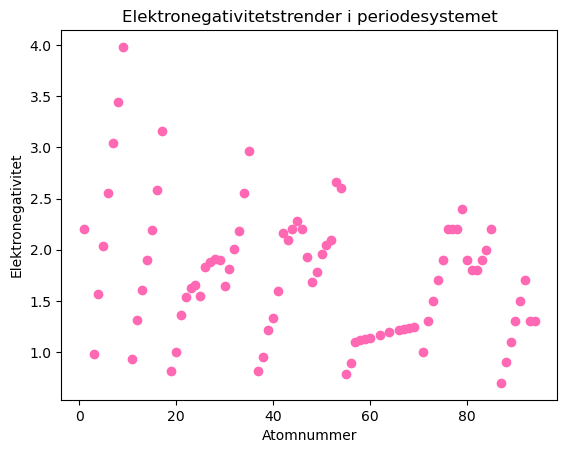

In [28]:
from mendeleev import element
import matplotlib.pyplot as plt

atomnumre = []
el_neg = []

for Z in range(1,119):
    grunnstoff = element(Z)
    elektronegativitet = grunnstoff.electronegativity()
    atomnumre.append(Z)
    el_neg.append(elektronegativitet)
    
plt.scatter(atomnumre, el_neg, color="hotpink")
plt.title("Elektronegativitetstrender i periodesystemet")
plt.xlabel("Atomnummer")
plt.ylabel("Elektronegativitet")
plt.show()

```{admonition} Underveisoppgave
:class: tip
Modifiser programmet slik at det kun plotter grunnstoffene i andre periode. Forklar trenden du ser.
```

````{admonition} Løsningsforslag
:class: tip, dropdown

```{code-block} Python
from mendeleev import element
import matplotlib.pyplot as plt

atomnumre = []
el_neg = []
gruppe2 = [4, 12, 20, 38, 56, 88]

for Z in gruppe2:
    grunnstoff = element(Z)
    elektronegativitet = grunnstoff.electronegativity()
    atomnumre.append(Z)
    el_neg.append(elektronegativitet)
    
plt.scatter(atomnumre, el_neg, color="navy")
plt.title("Elektronegativitetstrender i gruppe 2")
plt.xlabel("Atomnummer")
plt.ylabel("Elektronegativitet")
plt.show()
```
````

## Støkiometriske beregninger

La oss nå se på hvordan vi kan bruke biblioteket Chemlib til støkiometriske beregninger. Først definerer vi en kjemisk forbindelse med klassen _Compound_. Dette er et objekt av Compound-klassen. Deretter kan vi bruke ulike metoder på dette objektet. For eksempel kan vi gjør enkle beregninger på stoffmengde og masse.

### Stoffmengdeberegninger

In [29]:
from chemlib import Compound

butan1ol = Compound("C4H9OH")
NH3 = Compound("NH3")

In [30]:
butan1ol.get_amounts(grams=2)     # Finner stoffmengden og antall molekyler/formelenheter

{'grams': 2,
 'molecules': 1.6243271319293604e+22,
 'moles': 0.026982178271251833}

In [31]:
butan1ol.get_amounts(molecules=2) # Finner stoffmengden og massen

{'molecules': 2,
 'moles': 3.322259136212625e-24,
 'grams': 2.4625581395348844e-22}

### Løsninger og fortynning

Vi kan også lage en løsning med klassen _Solution_. Dette blir et objekt som vi kan finne konsentrasjonen til og fortynne. Det gjør du slik:

In [32]:
from chemlib import Solution

In [33]:
sol1 = Solution("NaNO3", 0.24)                                      # Lager en løsning med 0.24 mol/L NaNO3
sol2 = Solution.by_grams_per_liters("NaOH", grams = 40, liters = 1) # Lager en løsning med en viss masse i et gitt volum

In [34]:
print(sol2.molarity) # Finner molariteten til løsning 2

1.000075005625422


In [35]:
C2 = sol1.dilute(V1 = 0.1, V2 = 3.44) # Fortynner løsningen

In [36]:
C2

{'Solute': 'Na₁N₁O₃', 'Molarity': 0.0069767441860465115, 'Volume': 3.44}

### Kjemiske reaksjoner
Det er ganske rett fram å definere kjemiske reaksjoner når vi først har lagd noen forbindelser. Deretter kan vi sjekke om reaksjonen er balansert, og eventuelt få programmet til å balansere dem for oss.

In [37]:
from chemlib import Reaction

H2 = Compound("H2")
I2 = Compound("I2")
HI = Compound("HI")

In [38]:
reaksjon = Reaction([H2, I2],[HI]) # Reaktanter i liste til venstre, produkter i liste til høyre

In [39]:
print(reaksjon.formula)
print(reaksjon.is_balanced)

1H₂ + 1I₂ --> 1H₁I₁
False


In [40]:
reaksjon.balance()
reaksjon.formula

'1H₂ + 1I₂ --> 2H₁I₁'

- Oppgave: Bruk chemlib til å balansere ufullstendig forbrenning av benzen (vi får vann og CO)

## Elektrokjemi

Chemlib kan også brukes til å regne på og visualisere elektrokjemiske reaksjoner. Noen eksempler er gitt nedenfor.

### Galvaniske elementer

In [41]:
from chemlib import Galvanic_Cell

In [42]:
celle = Galvanic_Cell("Pb", "Zn")

In [43]:
egenskaper = celle.properties
print(egenskaper)

{'Cell': 'Zn | Zn2+ || Pb2+ | Pb', 'Anode': 'Zn', 'Cathode': 'Pb', 'Cell Potential': 0.63}


In [51]:
egenskaper["Cell Potential"] # trekker ut kun cellepotensialet
# celle.draw() #Tegner celle

0.63

### Elektrolyse

In [45]:
from chemlib import electrolysis

elektrolyse = electrolysis("Cu", n = 2, amps = 10, seconds = 3600)

In [46]:
elektrolyse

{'element': 'Cu',
 'n': 2,
 'seconds': 3600,
 'amps': 10,
 'grams': 11.854982639788567}

- Oppgave: Finn ut hvor lang tid det minimum tar å dekke en gjenstand med 30 g sølv med en løsning AgNO$_3$ når vi bruker en strømstyrke på 10 A.